In [1]:
# My matplotlib adjustments!

import matplotlib
params = {
	'axes.labelsize': 30,
	'font.size': 28,
	'legend.fontsize': 26,
	'xtick.labelsize': 28,
	'ytick.labelsize': 28,
	'lines.linewidth': 2,
	'text.usetex': False,
	# 'figure.autolayout': True,
	'ytick.right': True,
	'xtick.top': True,

	'figure.figsize': [10, 8], # instead of 4.5, 4.5
	'axes.linewidth': 2.5,

	'xtick.major.size': 24,
	'ytick.major.size': 24,
	'xtick.minor.size': 24,
	'ytick.minor.size': 24,

	'xtick.major.width': 2.5,
	'ytick.major.width': 2.5,
	'xtick.minor.width': 2.5,
	'ytick.minor.width': 2.5,

	'xtick.major.pad': 10,
	'ytick.major.pad': 10,
	#'xtick.minor.pad': 14,
	#'ytick.minor.pad': 14,

	'xtick.direction': 'in',
	'ytick.direction': 'in',
   }
matplotlib.rcParams.update(params)

# <font color='blue'> Lecture 1:  Statistics </font>

In this lecture I will provide practice on the how statistics are used to summarize data.

## 1. Statistics quantities

A **statistic** is a quantity which summarizes our data using quantities as the **mean** (average value), **median** (middle value) and **standard deviation** $\sigma$ (spread)...

- Mean $= \overline{x} = \frac{1}{N} \sum_{i}^N x_i$
- Median $=$ middle value when ranked
- Variance $= \sigma^2 = \frac{1}{N-1} \sum_{i=1}^N \left( x_i - \overline{x} \right)^2$

Here is an example of how to calculate these in python using the `scipy.stats` or `numpy` library:

*We have N=12 measurements of a variable, $x_i = (9.6, 6.2, 8.3, 6.1, 7.0, 7.9, 7.3, 6.4, 7.1, 6.3, 6.8, 10.1)$.  Estimate the mean, variance and median of this dataset.  What are the errors in the estimators?*

In [2]:
import numpy as np
from scipy import stats
x = [9.6, 6.2, 8.3, 6.1, 7.0, 7.9, 7.3, 6.4, 7.1, 7.3, 6.8, 10.1]

'''
#Using scipy library

s = stats.describe(x)
mu = s.mean                    # mean
variance = s.variance          # variance
sigma = np.sqrt(variance)      # standard deviation
median = np.median(x)          # median
mode = stats.mode(x)           # Mode
'''

# Using numpy and note that N-1 for variance!
mu = np.mean(x)                   # mean
variance = np.var(x, ddof=1)      # variance, ddof: Delta Degrees of Freedom: the divisor used in the calculation is N - ddof
sigma = np.std(x)                 # standard deviation = np.sqrt(variance)
median = np.median(x)             # Median
mode = stats.mode(x)

print('Mean =',mu)
print('Variance =',variance)
print('Standard deviation =',sigma)
print('Median =',median)
print('Mode =',mode)

# Note on the ddof: https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python

Mean = 7.508333333333333
Variance = 1.6190151515151512
Standard deviation = 1.2182352901727245
Median = 7.199999999999999
Mode = ModeResult(mode=array([7.3]), count=array([2]))


In [3]:
(9.6 + 6.2 + 8.3 + 6.1 + 7.0 + 7.9+ 7.3+ 6.4+ 7.1+ 7.3+ 6.8+ 10.1)/12

7.508333333333332

## We can summary that our data can be describe with a mean value and standard deviation: $7.508 \pm 1.62$

We can estimate errors in each statistical quantity:

- Error in the mean = $\sigma/\sqrt{N}$
- Error in the variance = $\sigma^2 \sqrt{2/(N-1)}$
- Error in the median = $1.25 \sigma/\sqrt{N}$

In [4]:
N = len(x)
print('Error in mean =',sigma/np.sqrt(N))
print('Error in variance =',variance*np.sqrt(2./(N-1)))
print('Error in median =',1.25*sigma/np.sqrt(N))

Error in mean = 0.35167423635876216
Error in variance = 0.6903503801872348
Error in median = 0.43959279544845276


## 1.1 Optimal combination of data

- We have $N$ independent measurements estimates $x_i$ of some quantity $y$, each has varying errors $\sigma_i$. What is our best combined estimate of $y$?.

- The combined error is minimized: $\hat{y} = \frac{ \sum_{i=1}^N  x_i / \sigma_i^2 }{ \sum_{i=1}^N 1/\sigma_i^2 }$. 

where the weights are **inverse-variance**, $w_i = 1/\sigma_i^2$


**Example:**

_We have 10 measurements of a quantity y $(6.8 \pm 2.0, 6.5 \pm 1.1, 4.3 \pm 1.7, 5.5 \pm 0.5, 6.0 \pm 2.5, 7.1 \pm 1.3, 4.7 \pm 1.2, 5.8 \pm 1.1, 6.5 \pm 0.5, 5.4 \pm 2.6)$.  What is the optimal estimate of this quantity, and the error in that estimate?_

Note: The quantity $y$ can be examply the size of phone screens in inches!

In [5]:
x_mean_measurement = np.array([ 6.8, 6.5, 4.3, 5.5, 6.0, 7.1, 4.7,  5.8 , 6.5, 5.4 ])                    # 10 measurements of a quantity
sigma = np.array([2.0, 1.1, 1.7, 0.5, 2.5, 1.3, 1.2, 1.1, 0.5 , 2.6 ])                # errors in these measurements
weight = 1./(sigma**2)                         # weights

print('Weights =', weight)
print('Combined estimate =',np.sum(weight*x_mean_measurement)/np.sum(weight))      ## The mean length of a phone screen.

print('Error in combined estimate =',1./np.sqrt(np.sum(weight)))


Weights = [0.25       0.82644628 0.34602076 4.         0.16       0.59171598
 0.69444444 0.82644628 4.         0.14792899]
Combined estimate = 5.959389605768109
Error in combined estimate = 0.29058225196591064


# 2. Correlation

How to quantify the correlation between variables:

- Degree of correlation of 2 variables

## Correlation versus independence

If variables are correlated, they will share statically relationship. 

Example of generating a **uncorrelated** random variables.

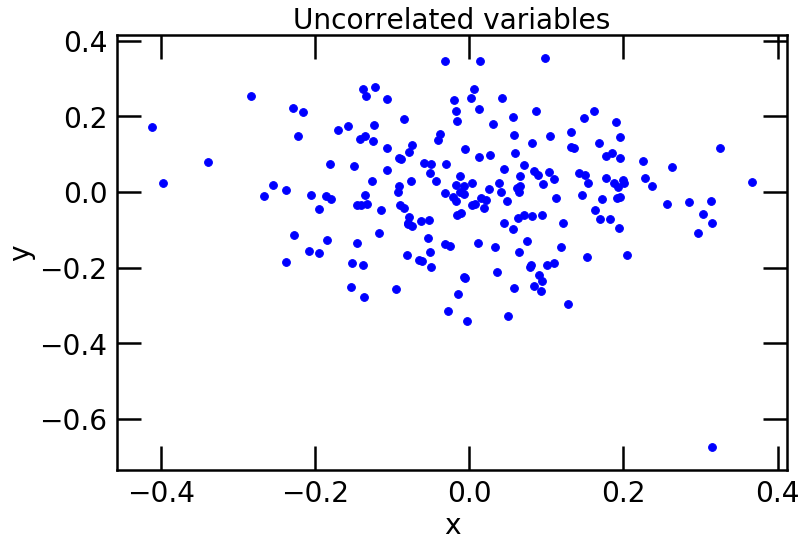

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 200 # number of data points

mux,sigx = 0.5,0.15 # mean and standard deviation of x
muy,sigy = 0.7,0.15 # mean and standard deviation of y

x = sigx*np.random.normal(size=n) # draw x from a Gaussian distribution with mean=0 and sig=sigx
y = sigy*np.random.normal(size=n) # draw y from a Gaussian distribution with mean=0 and sig=sigy

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x,y,marker='o',s=60, color='b')
ax.set_title('Uncorrelated variables', fontsize = 28)
ax.set_xlabel("x",fontsize=28)
ax.set_ylabel("y",fontsize=28)

plt.savefig('stats_uncorrelated.png',dpi=300)

Example of generating a **correlated** random variables.

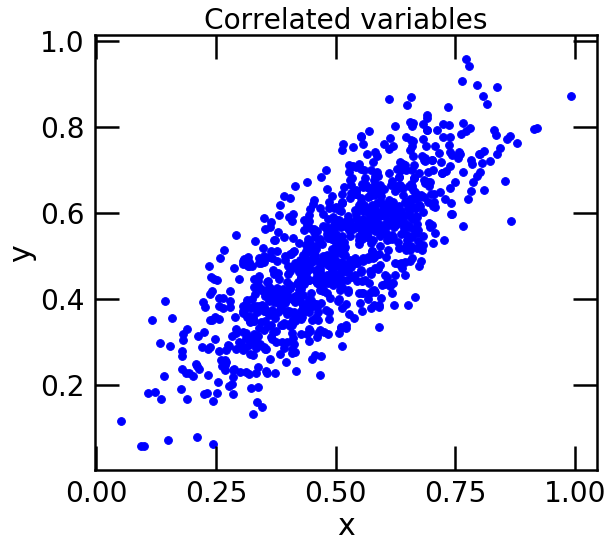

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 1000   # number of data points
r = 0.8    # correlation coefficient, between -1 and +1 (see below), you can change this parameter to observe the distribution of variables.
mux,sigx = 0.5,0.15    # mean and standard deviation of x
muy,sigy = 0.5,0.15    # mean and standard deviation of y

x = sigx*np.random.normal(size=n)   # draw x from a Gaussian distribution with mean=0 and sig=sigx
y = sigy*np.random.normal(size=n)   # draw y from a Gaussian distribution with mean=0 and sig=sigy
y1 = x*r + y*np.sqrt(1-r**2)        # generate a new variable which is correlated with x with correlation coefficient r
x = x + mux        # shift x to mean=mux
y = y1 + muy       # shift y to mean=muy

fig, ax = plt.subplots(figsize=(9, 8))
ax.scatter(x,y,marker='o',s=60, color='b')
ax.set_title('Correlated variables', fontsize = 28)
ax.set_xlabel("x")
ax.set_ylabel("y")


plt.savefig('stats_correlated_r0.8.png',dpi=300)

In [8]:
#np.random.normal?

## 2.1 Correlation coefficient

The correlation coefficient measures **the strength of the correlaton** between variables.

If the variables have means $(\mu_x, \mu_y)$ and standard deviations $(\sigma_x, \sigma_y)$, then the definition of the correlation coefficient is:

$$\rho = \frac{\langle (x - \mu_x) (y - \mu_y) \rangle}{\sigma_x \sigma_y} = \frac{\langle x y \rangle - \mu_x \, \mu_y}{\sigma_x \, \sigma_y}.$$


Here

$\langle x y \rangle = \int_{-\infty}^\infty \int_{-\infty}^\infty x \, y \, P(x,y) \, dx \, dy$

Note: we'll use $\rho$ to mean the underlying **theoretical** correlation, and $r$ as the **value estimated from the data**.

- $\rho = 0$: **NO correlation**, $P(x,y)$ is separable into $f(x) \, g(y)$ hence $\langle x y \rangle = \langle x \rangle \langle y \rangle = \mu_x \mu_y$ and $\rho = 0$.

- $\rho = +1$: **Complete correlation**, $y = C x$.

- $\rho = -1$: **Complete anti-correlation**, $y = - C x$.

- The possible range: $-1 \le \rho \le +1$.

## Correlation testing

Let's consider an example $(x,y)$ dataset and test the correlation. 

This may involve both **estimating the correlation coefficient** and **determining the likelihood of obtaining this correlation coefficient if the underlying data are uncorrelated** (i.e., testing whether the correlation has resulted by random chance).

First let's read in an example dataset:

In [9]:
# Read in the file correlation_example.dat and make a scatter plot

# You will need to change the file path to the location where you've saved the data
direc = '/Users/USTH/TEACHING/SA2.7DataAnalysisandVisualization/data/'

data = np.loadtxt(direc+'correlation_example.dat')
x,y = data[:,0],data[:,1]
n = len(x)

print(r'$x_i :$ ', x, r'$y_i :$',y, '\nlen (x)', len(x))

$x_i :$  [0.4010987  0.61397198 0.22082232 0.39900116 0.71261032 0.49253665
 0.55266878 0.55070103 0.4405896  0.45080661 0.71382892 0.59930651
 0.32133681 0.64008218 0.56387599 0.62488159 0.89358568 0.58804503
 0.46168047 0.32372381 0.48213731 0.51184535 0.68512269 0.49285347
 0.69972098 0.56254386 0.36469372 0.64648513 0.46719827 0.41981129
 0.29024339 0.29319931 0.38915734 0.5562401  0.62672163 0.35767358
 0.4857693  0.44584219 0.60674662 0.53892554 0.47115123 0.55957788
 0.63203741 0.27386628 0.18157999 0.39005232 0.29192867 0.53260657
 0.49179352 0.59965577 0.28942233 0.34537644 0.45906448 0.76211572
 0.42891952 0.64743609 0.73660333 0.40254861 0.38813284 0.34874033
 0.5158845  0.60898919 0.61899372 0.19589902 0.45247522 0.44966835
 0.55120737 0.54734406 0.40479218 0.54358511 0.71801052 0.29508769
 0.46825453 0.66527343 0.71768586 0.53219469 0.40763666 0.45667952
 0.49546803 0.61979055 0.31872801 0.47807837 0.32919585 0.30590415
 0.09976684 0.50925799 0.18231865 0.38049276 0.542942

Text(0,0.5,'$y$')

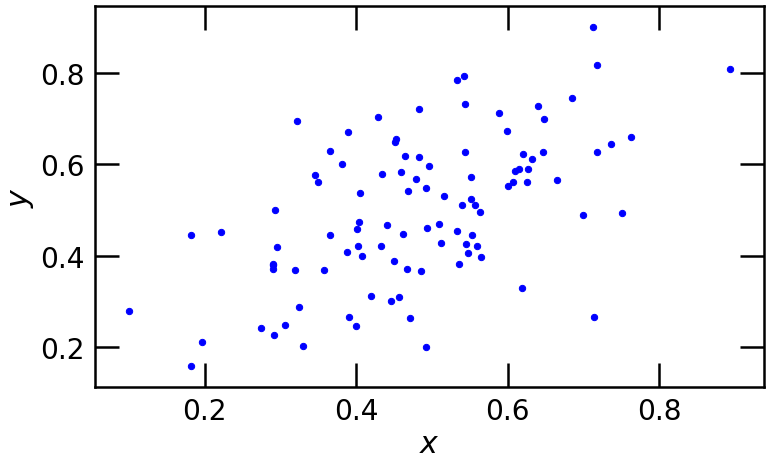

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(x,y,marker='o',s=40, color='b')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Exercise 

Calculate the means ($\mu_x, \mu_y$), the deviation ($\sigma_x, \sigma_y$), then estimate the correlation coefficient.

---
## Pearson product-moment correlation coefficient

**Pearson product-moment formula** estimates the correlation coefficient of data samples $(x_i, y_i)$:



$$r = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_i (x_i - \overline{x})^2 \sum_i (y_i - \overline{y})^2}} = \frac{\sum_i x_i y_i - N \overline{x} \overline{y}}{(N-1) \sqrt{{\rm Var}(x) {\rm Var}(y)}}.$$

$r$ is presented of $\rho$ with possible range $-1 \le r \le +1$.

If we additionally suppose that $(x,y)$ are drawn from a **bivariate Gaussian distribution** (which often works pretty well), the expression for the **uncertainty** in the measured value if $r$ is:

$$\sigma(r) = \sqrt{\frac{1-r^2}{N-2}}.$$

## Significance of a correlation measurement
After test correlation, we need to check the **significance** of the correlation:

$$t = r \sqrt{\frac{N-2}{1-r^2}}.$$

In [11]:
from scipy import stats
r,p = stats.pearsonr(x,y) # evaluate Pearson correlation coefficient r and p-value for non-correlation
print('Correlation coefficient r =',r)
print('Error in r =',np.sqrt((1.-r**2)/float(n-2)))  
print('p-value for non-correlation =',p)

Correlation coefficient r = 0.548341521611091
Error in r = 0.08447446031603906
p-value for non-correlation = 3.513624460312244e-09


In [12]:
t = r*np.sqrt(float(n-2)/(1-r**2))        # compute t-statistic
nu = n-2                                  # number of degrees of freedom (there are 2 variables x, y)
p = stats.t.sf(t,nu)                      # probability of t-distribution having this value or larger
p *= 2.                                   # convert to 2-tailed test

print('t statistic =',t)
print('degrees of freedom nu =',nu)
print('p-value for non-correlation =',p)  # should agree with value in the previous cell

t statistic = 6.491210711019814
degrees of freedom nu = 98
p-value for non-correlation = 3.513624460312219e-09


**Example:**

We measure r = 0.8 for N = 10 data points. Is this correlation significant?

In [13]:
r=0.5 #, 0.5   # Vary value r
N=10

t = r*np.sqrt( (N-2)/(1-r**2))
t

1.632993161855452

dx 0.1
p-value1 = 0.07413305208441175
p-value2 = 0.0030213037524912017
i 65
i 86


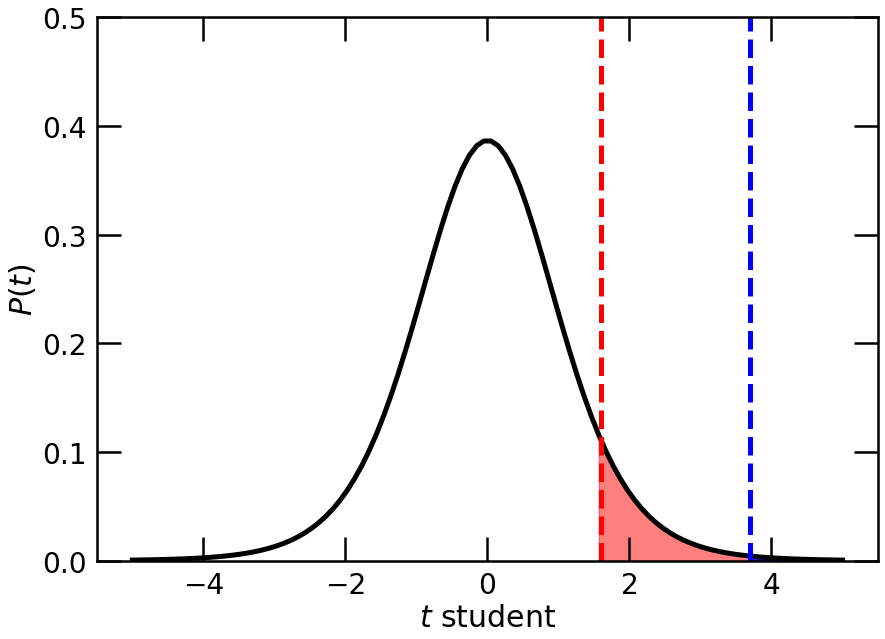

In [14]:
nu = 10-2       # number of degrees of freedom = data point - number of parameters
t1 = 1.6     # 1st value of chi-squared to test
t2 = 3.7     # 2nd value of chi-squared to test


# Range of values for t
xmin,xmax,nx = -5,5,100
x_t = np.linspace(xmin,xmax,nx)
dx = (xmax-xmin)/nx  ; print('dx',dx)    # bin size
ymin,ymax = 0.,0.5


## Calculate p value
dof = nu                                 # number of degrees of freedom (data points minus fitted parameters)
p_value1 = stats.t.sf(t1,dof)            # probability of chi-squared to exceed the value we've found
                                         # 1 - : Becasue The p value is calculated from intergrating from are that greater than value of chi-square
p_value2 = stats.t.sf(t2,dof)
print('p-value1 =', p_value1)
print('p-value2 =', p_value2)


# Determine chi-squared probability distribution
y_t = stats.t.pdf(x_t,dof)


fig = plt.figure(figsize=(14, 10) )
plt.plot(x_t,y_t,color='black',lw=5)


# Find 1st chi-squared test value in array, and shade area under the curve at greater values
plt.plot([t1,t1],[ymin,ymax],color='red',linestyle='dashed',lw=5)
i = int((t1-xmin)/dx) ;print('i',i)
plt.fill_between(x_t[i:], np.zeros_like(x_t[i:]), y_t[i:], color='red',alpha=0.5)
#print(np.zeros_like(x_t[i:]), y_t[i:])


# Find 2nd chi-squared test value in array, and shade area under the curve at greater values
plt.plot([t2, t2],[ymin,ymax],color='blue',linestyle='dashed',lw=5)
i = int((t2-xmin)/dx) ; print('i',i)
plt.fill_between(x_t[i:], np.zeros_like(x_t[i:]), y_t[i:], color='blue', alpha=0.8)


# Complete plot
plt.xlabel(r'$t$ student')
plt.ylabel(r'$P(t)$')
#plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.savefig('t_test.png',dpi=300)

In [15]:
#stats.t.sf?

---
## Hubble and Lemaitre datasets

For the two datasets, determine the Pearson
correlation	coefficient, its error and statistical	significance

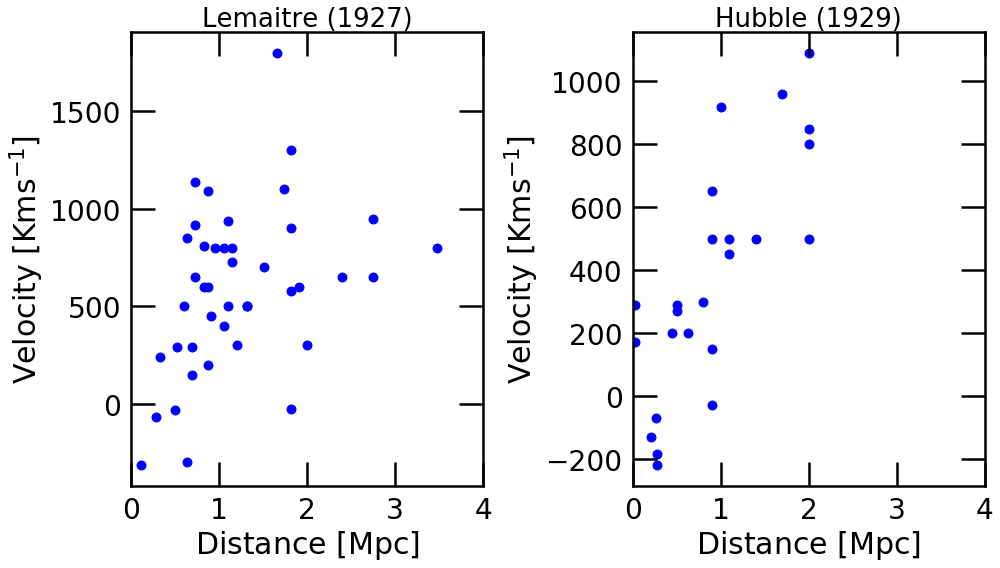

In [16]:
data_Hubble = np.loadtxt(direc+'hubble.dat')
data_Lemaitre = np.loadtxt(direc+'lemaitre.dat')

Distance_Hubble,Velocity_Hubble = data_Hubble[:,0],data_Hubble[:,1]
Distance_Lemaitre,Velocity_Lemaitre = data_Lemaitre[:,0],data_Lemaitre[:,1]

#fig, ax = plt.subplots(figsize=(10, 7))
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

axes[0].scatter(Distance_Lemaitre,Velocity_Lemaitre,marker='o',s=80, color='b')
axes[0].set_xlabel(r'Distance $\rm [Mpc]$')
axes[0].set_ylabel(r'Velocity $\rm [Kms^{-1}]$')
axes[0].set_xlim(0,4)
axes[0].set_title('Lemaitre (1927)', fontsize=26)


axes[1].scatter(Distance_Hubble,Velocity_Hubble,marker='o',s=80, color='b')
axes[1].set_xlabel(r'Distance $\rm [Mpc]$')
axes[1].set_ylabel(r'Velocity $\rm [Kms^{-1}]$')
axes[1].set_xlim(0,4)
axes[1].set_title('Hubble (1929)', fontsize=26)

plt.tight_layout()

plt.savefig('Hubble_constant.png',dpi=300)

In [17]:
Distance_Hubble

array([0.032, 0.03 , 0.214, 0.263, 0.275, 0.275, 0.45 , 0.5  , 0.5  ,
       0.63 , 0.8  , 0.9  , 0.9  , 0.9  , 0.9  , 1.   , 1.1  , 1.1  ,
       1.4  , 1.7  , 2.   , 2.   , 2.   , 2.   ])

In [18]:
Velocity_Hubble

array([ 170.,  290., -130.,  -70., -185., -220.,  200.,  290.,  270.,
        200.,  300.,  -30.,  650.,  150.,  500.,  920.,  450.,  500.,
        500.,  960.,  500.,  850.,  800., 1090.])

# Exercise:

Calculaye the means $\mu_{distance}, \mu_{velocity}$ and $\sigma_{distance}, \sigma_{velocity}$ for Hubble and Lemaitre measurement. 

- Estimate the Pearson correlation coefficient 
- The error of the $r$ measurement
- Test the significant of the measurements.

Who discover the expamsion of the Universe?

***Note! The hypothesis testing lecture will provide $\chi^2$ method, p-value to test the data.***

# Tensions between the Early and the Late Universe
Currently, there are tensions between measurements of the Hubble constant at the early and the late Universe! A review paper: https://arxiv.org/pdf/1907.10625.pdf

<img src="Images/Hubble_Tension.png">